In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv(r"/home/upsidedown/Desktop/DS/2_Data Wrangling 2/dataset.csv")
df.head()

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40


In [7]:
df.describe()

,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000
mean,8.623097e+09,8.834219,9.095469,9.292031,9.377187
std,9.132070e+08,11.187839,11.171986,0.528523,0.495185
min,7.028870e+09,0.000000,0.000000,6.900000,7.200000
25%,7.766559e+09,7.237500,7.655000,9.050000,9.140000
50%,8.805720e+09,8.260000,8.400000,9.445000,9.450000
75%,9.335094e+09,8.802500,9.115000,9.645000,9.725000
max,9.975810e+09,95.000000,95.000000,9.910000,9.950000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             64 non-null     object 
 1   Email Address         64 non-null     object 
 2   Name                  64 non-null     object 
 3   Email                 64 non-null     object 
 4   Roll no               64 non-null     object 
 5   PRN No.               64 non-null     object 
 6   Mobile No.            64 non-null     int64  
 7   First year:   Sem 1   64 non-null     float64
 8   First year:   Sem 2   64 non-null     float64
 9   Second year:   Sem 1  64 non-null     float64
 10  Second year:   Sem 2  64 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 5.6+ KB


In [28]:
df.columns

Index(['Timestamp', 'Email Address', 'Name', 'Email', 'Roll no ', 'PRN No.',
       'Mobile No.', 'First year:   Sem 1', 'First year:   Sem 2',
       'Second year:   Sem 1', 'Second year:   Sem 2'],
      dtype='object')

In [18]:
df["Roll no "].head()

0    TECOC359
1    TECOC347
2    TECOC340
3    TECOC328
4    TECOC326
Name: Roll no , dtype: object

In [25]:
# getting rid of the alphabets in the seat no.
df["Roll no "] = df["Roll no "].str[-3:]

# Outliers with box plot

<Axes: ylabel='First year:   Sem 1'>

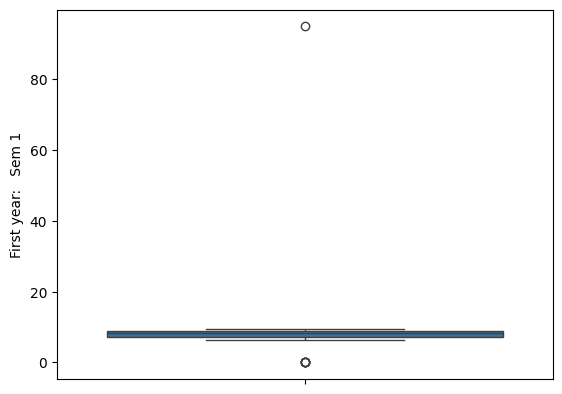

In [30]:
sns.boxplot(y=df['First year:   Sem 1'])
# the dots are outliers, theres a 95 gpa reading, error in the data

In [5]:
# Calculating quartiles
Q1 = df['First year:   Sem 1'].quantile(0.25)
Q3 = df['First year:   Sem 1'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Finding outlier thresholds (outliers are typically 1.5 times the iqr)
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Filtering outliers
df_filtered = df[(df['First year:   Sem 1'] >= lower_threshold) & (df['First year:   Sem 1'] <= upper_threshold)]

df_filtered.head()


,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40


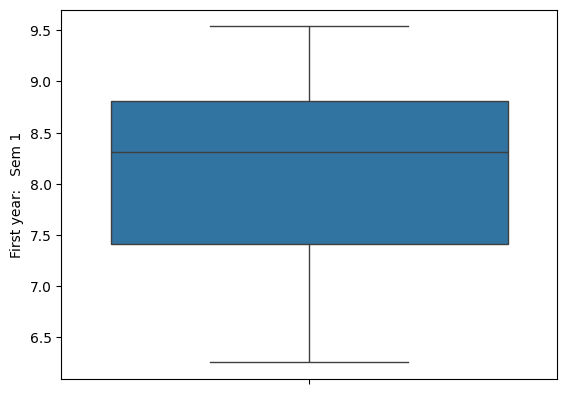

In [40]:
sns.boxplot(y=df_filtered['First year:   Sem 1']);
# got rid of em outliers

In [41]:
# Try the same for remaining semester marks and remove outliers 

# Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [54]:
df['First year:   Sem 1 scaled'] = scaler.fit_transform(df[['First year:   Sem 1']]) 
#using df[[]] cuz it expects a 2d array,(usually when scaling 1 feature) or use reshape(-1, 1) means -1 (unknown rows yet) & 1 col

In [53]:
df.head()

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2,First year: Sem 1 scaled
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,359,72026841K,8208217782,8.40,8.60,9.80,9.90,0.088421
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,347,72026776F,9021261925,8.14,8.14,9.32,9.82,0.085684
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,340,72026742M,9009804629,6.61,6.61,9.14,9.14,0.069579
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,328,72026696D,8698227548,7.20,7.30,8.90,9.20,0.075789
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,326,72026682D,7774072850,7.05,7.45,9.05,9.40,0.074211
